# Analyse exploratoire

## Imports et lecture des données

### Imports

In [ ]:
import matplotlib.pyplot as plt
import mplfinance as mpl
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from src.utils import init_notebook

In [ ]:
init_notebook()

### Lecture des données

In [ ]:
data_folder = "data/raw_data"

In [ ]:
stock_name = "AAPL"

In [ ]:
df = pd.read_csv(
    f"{data_folder}/{stock_name}.csv", parse_dates=["Date"], index_col="Date"
)
print(f"{df.shape = }")

df.shape = (756, 6)


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=756, freq=None)

## Présentation

**Plan de la présentation**

**1) Introduction**
- présentation du jeu de données
- définition de la problématique

**2) Décomposition : tendance**
- différents modèles (régressions, moyennes mobiles, B-splines)
- retrait de la tendance

**3) Décomposition : saisonnalité**
- affichage graphique (seasonal plot, periodogram)
- retrait de la saisonnalité

**4) Prédiction**
- différents modèles (ARMA / ARIMA, Prophet)
- comparaison des prédictions

**5) Conclusion**
- réponse à la problématique

## Analyse exploratoire

### Jeu de données

Cours de l'action Apple de janvier 2019 à janvier 2022 (3 ans)

- 756 dates (weekends et jours fériés exclus) => données journalières
- 6 valeurs par date : Open, High, Low, Close, Adj. Close et Volume
- nous n'étudierons que le cours de fermeture Close

### Affichage des données

#### Candlestick chart (graphique en bougie)

![](../../assets/img/candle-stick-explanation.png)

In [ ]:
df_3_mois = df[df.index < pd.Timestamp("2019-03-01")]

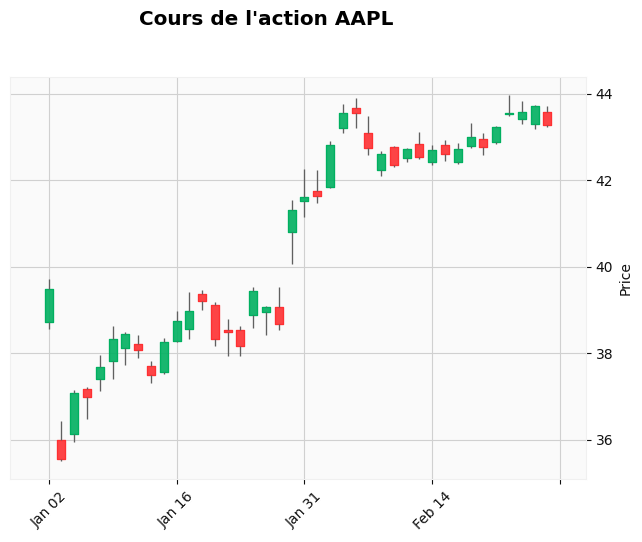

In [ ]:
mpl.plot(
    df_3_mois, type="candle", title=f"Cours de l'action {stock_name}", style="yahoo"
)

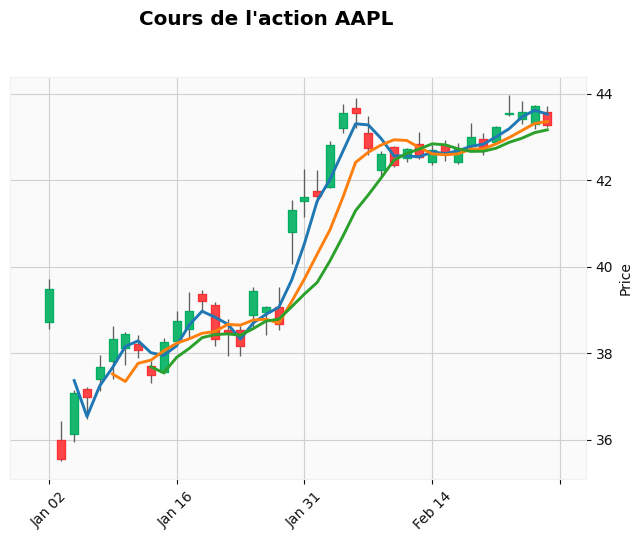

In [ ]:
mpl.plot(
    df_3_mois,
    type="candle",
    mav=(3, 6, 9),
    title=f"Cours de l'action {stock_name}",
    style="yahoo",
)

#### Line plot

<Axes: title={'center': "Cours de l'action AAPL"}, xlabel='Date', ylabel='Price'>

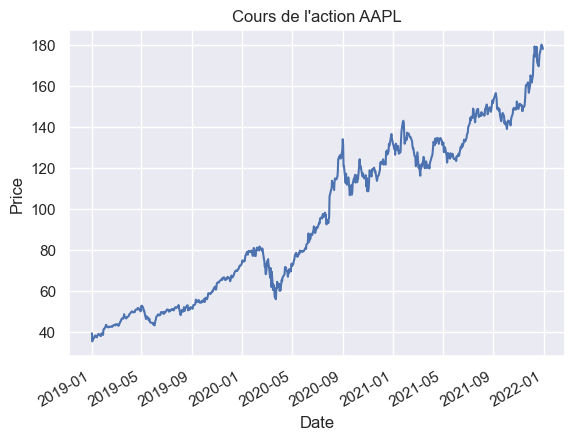

In [ ]:
df["Close"].plot(title=f"Cours de l'action {stock_name}", ylabel="Price")

<Axes: title={'center': "Cours de l'action AAPL"}, xlabel='Date', ylabel='Price'>

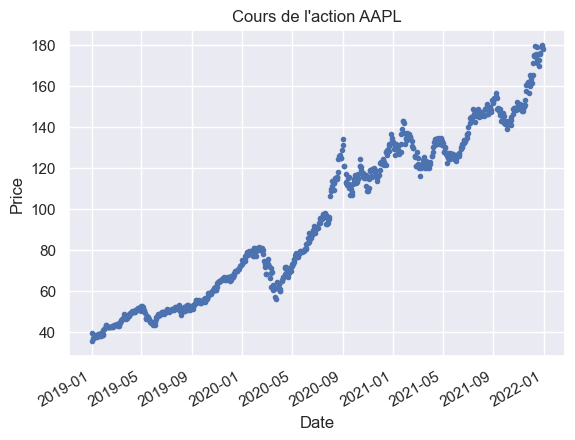

In [ ]:
df["Close"].plot(title=f"Cours de l'action {stock_name}", ylabel="Price", style=".")

### Auto-corrélation (ACF et PACF)

#### Auto-corrélation (ACF)

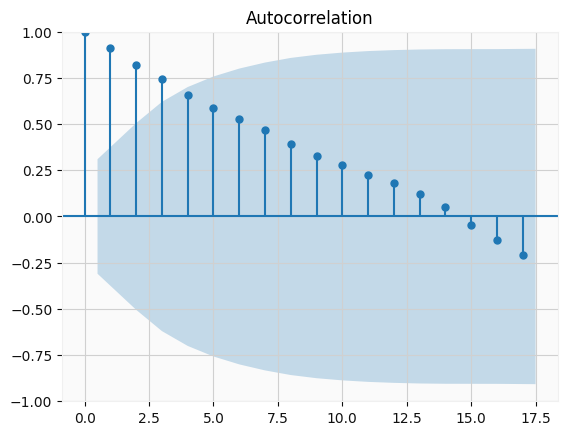

In [ ]:
lag = len(df_3_mois) - 1
_ = plot_acf(df_3_mois["Close"], lags=lag)

#### Auto-corrélation partielle (PACF)

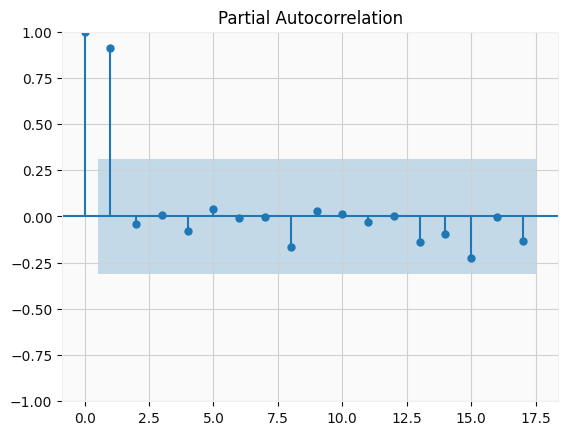

In [ ]:
lag = len(df_3_mois) // 2 - 1
_ = plot_pacf(df_3_mois["Close"], lags=lag)

### Lag plot

<Axes: title={'center': 'Lag plot (lag = 1)'}, xlabel='y(t)', ylabel='y(t + 1)'>

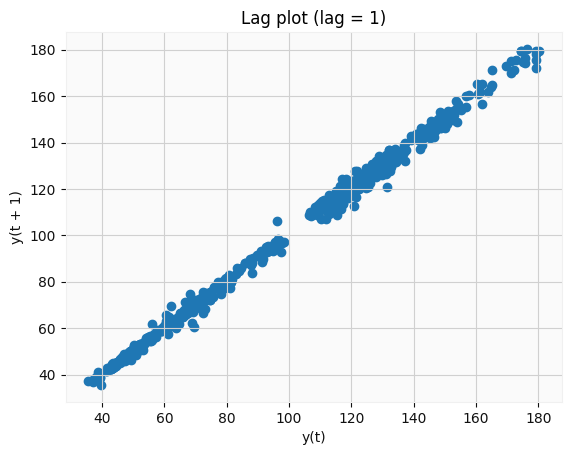

In [ ]:
lag = 1
plt.title(f"Lag plot ({lag = })")
pd.plotting.lag_plot(df["Close"], lag=lag)

<Axes: title={'center': 'Lag plot (lag = 10)'}, xlabel='y(t)', ylabel='y(t + 10)'>

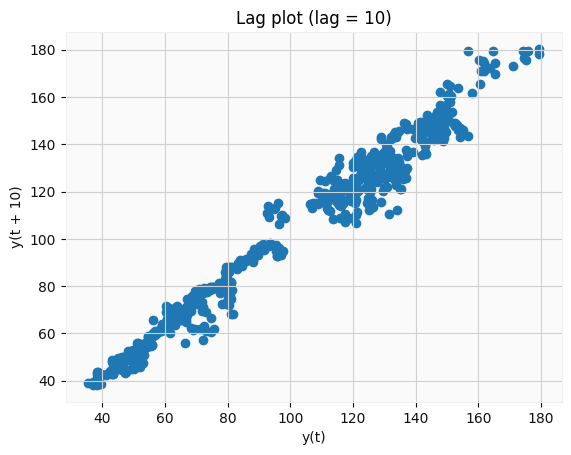

In [ ]:
lag = 10
plt.title(f"Lag plot ({lag = })")
pd.plotting.lag_plot(df["Close"], lag=lag)

## Problématique

Nous cherchons à prédire le cours boursier d'Apple à horizon 2 mois.

Objectifs :
- prédiction à 60 jours pour pouvoir spéculer
- avoir un intervalle de confiance (pour ne pas prendre trop de risque)